In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def onehot_to_str(label):
    """
    ワンホットベクトル形式のラベルをカタカナ文字に変換する
    """
    dic_katakana = {"a":0,"i":1,"u":2,"e":3,"o":4,"ka":5,"ki":6,"ku":7,"ke":8,"ko":9,"sa":10,"si":11,"su":12,"se":13,"so":14}
    label_int = np.argmax(label)
    for key, value in dic_katakana.items():
        if value==label_int:
            return key
    

# 画像読み込み
data = np.load("../1_data/train_data.npy")  # パスは適宜変更すること
data = data[:1]
label = np.load("../1_data/train_label.npy")  # パスは適宜変更すること
label_copy = label.copy()
label = label[:1]
label = onehot_to_str(label)

print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


データをmatplotlibが出力できるようにする

In [7]:
train_data_image = train_data.reshape(3000, 28,28)
print(train_data_image.shape)

(3000, 28, 28)


In [12]:
vec_trans_id = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

label_id = np.dot(label_copy, vec_trans_id.T)

df = pd.DataFrame({'label_id':label_id})
display(df.head(5))
display(df.tail(5))

,label_id
0,13
1,13
2,13
3,13
4,13


,label_id
2995,3
2996,3
2997,3
2998,3
2999,3


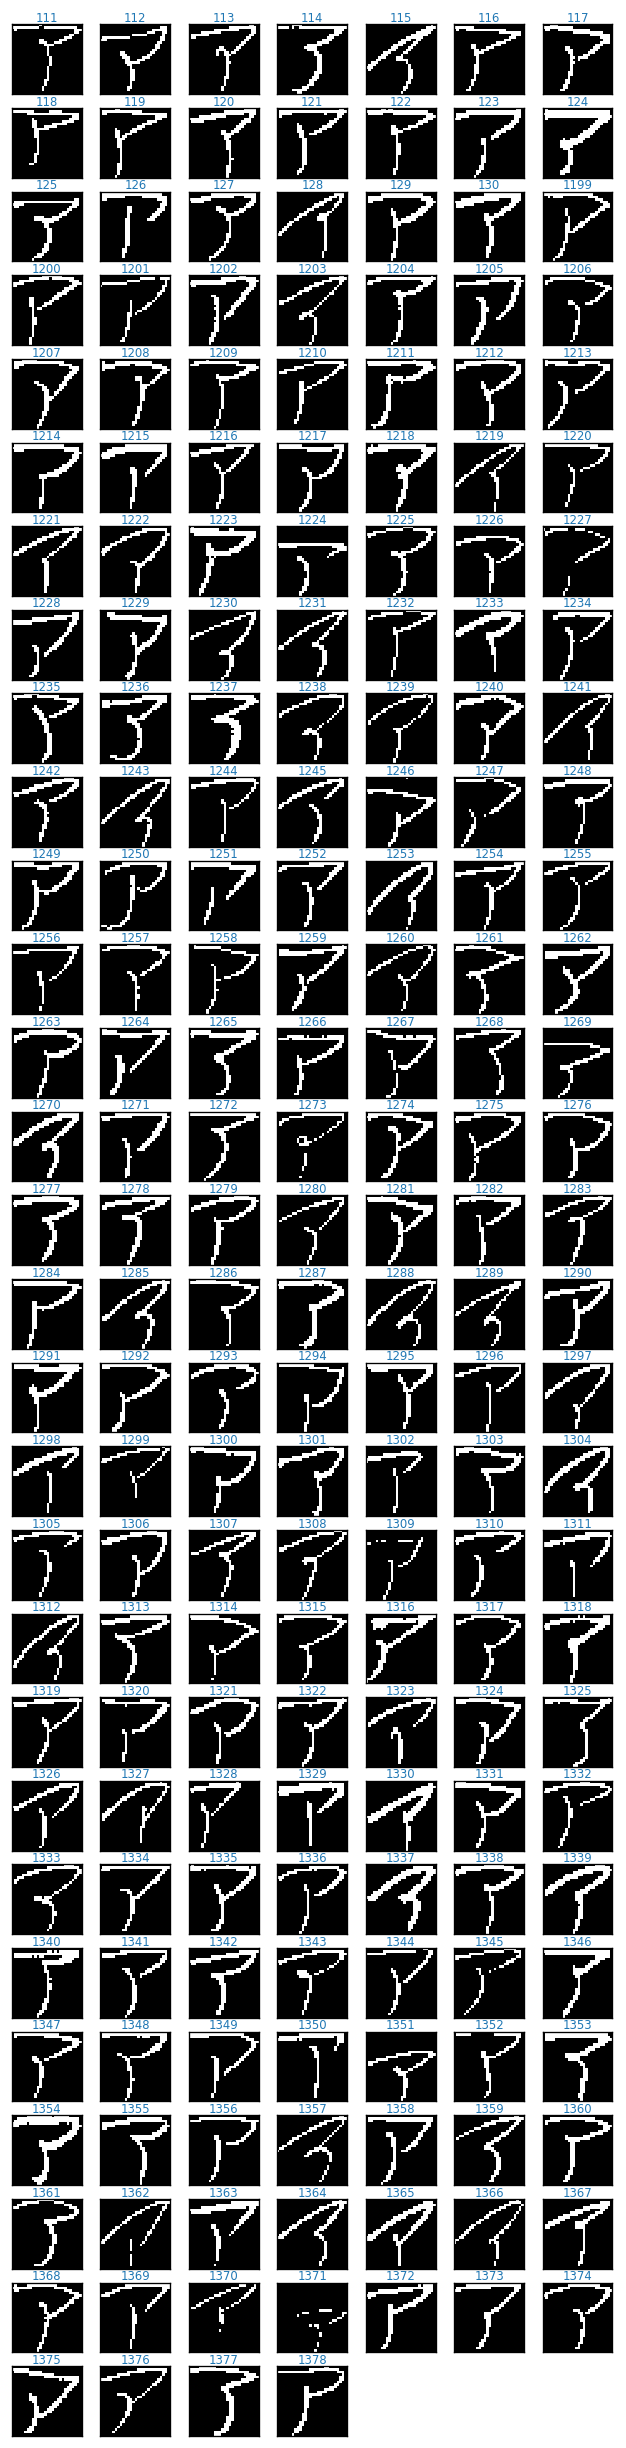

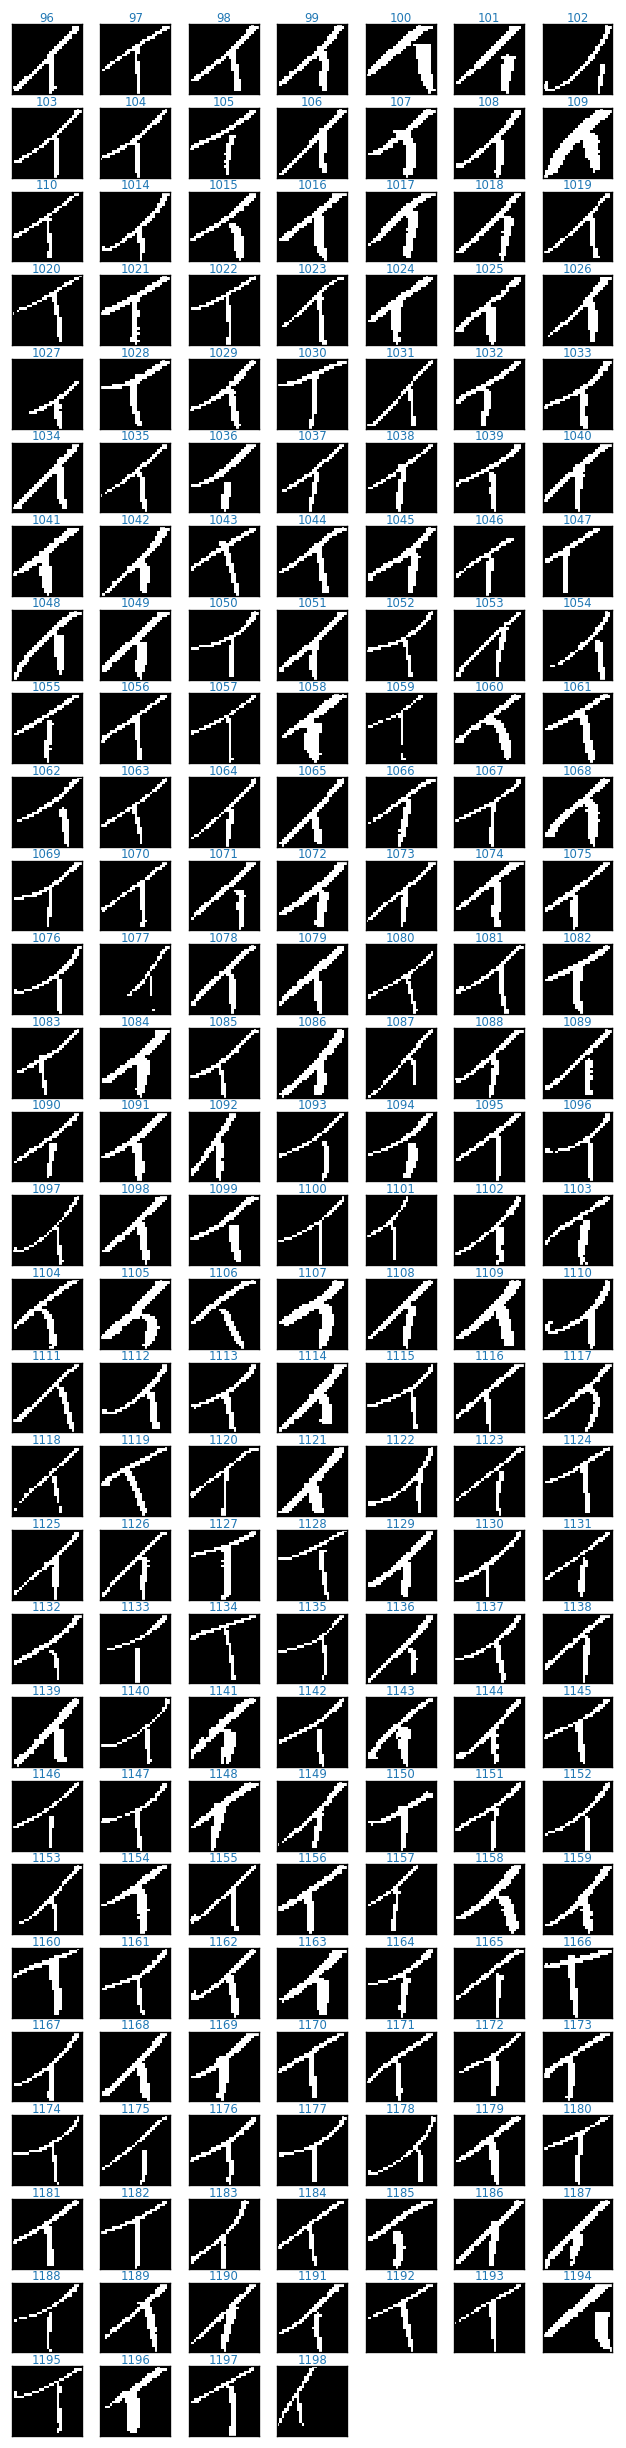

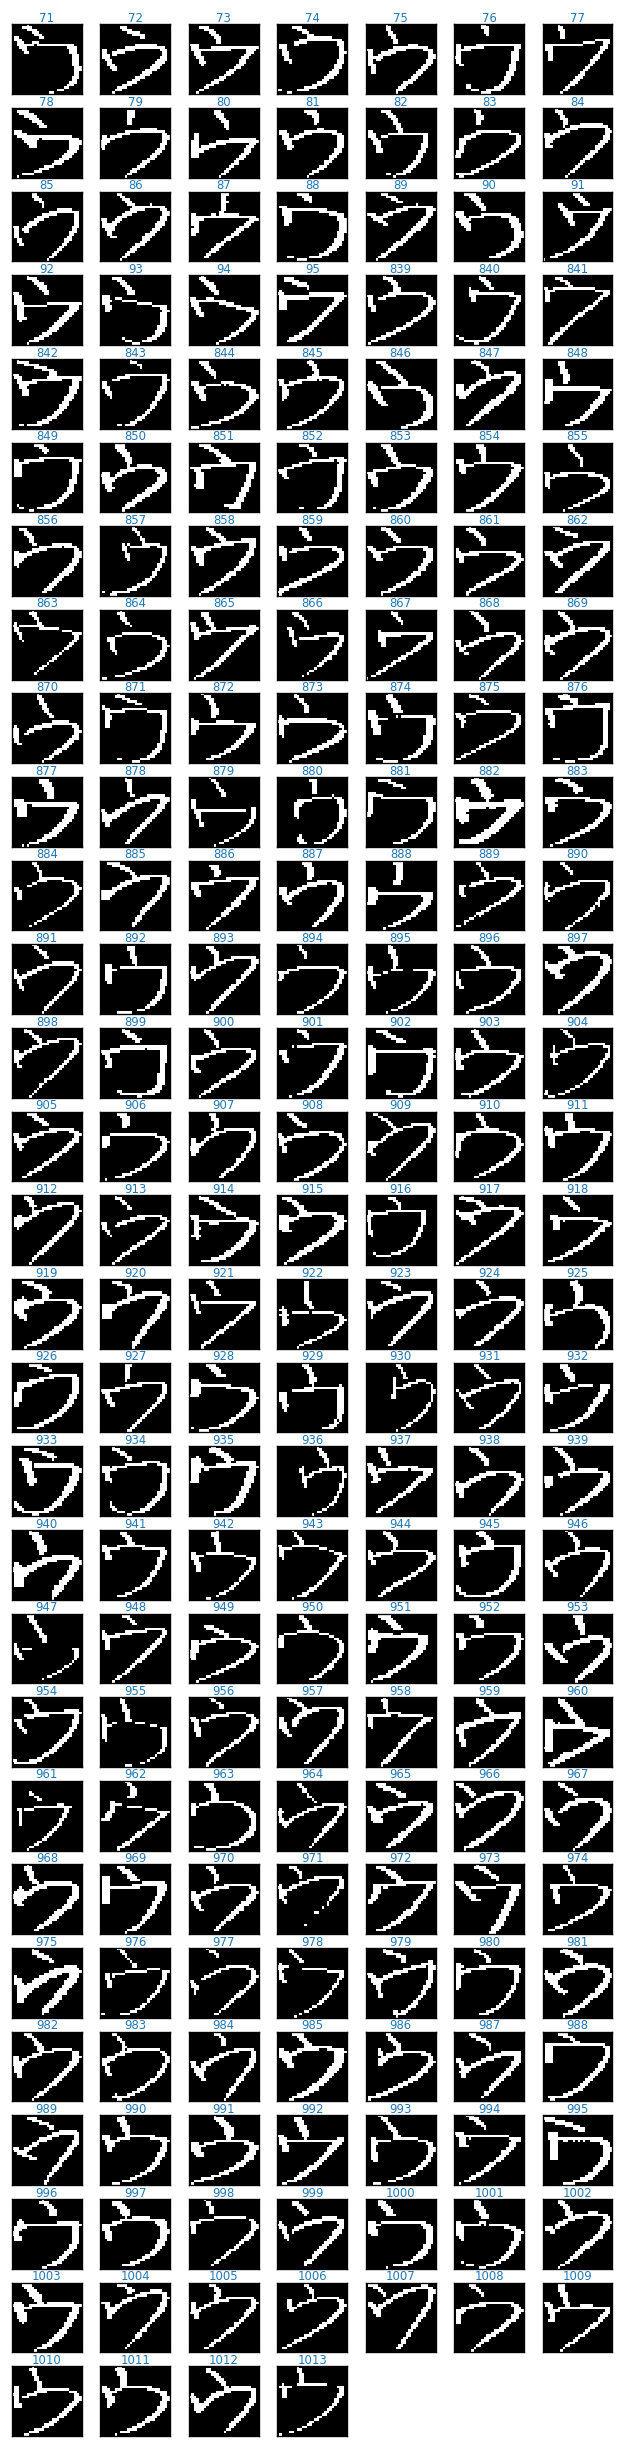

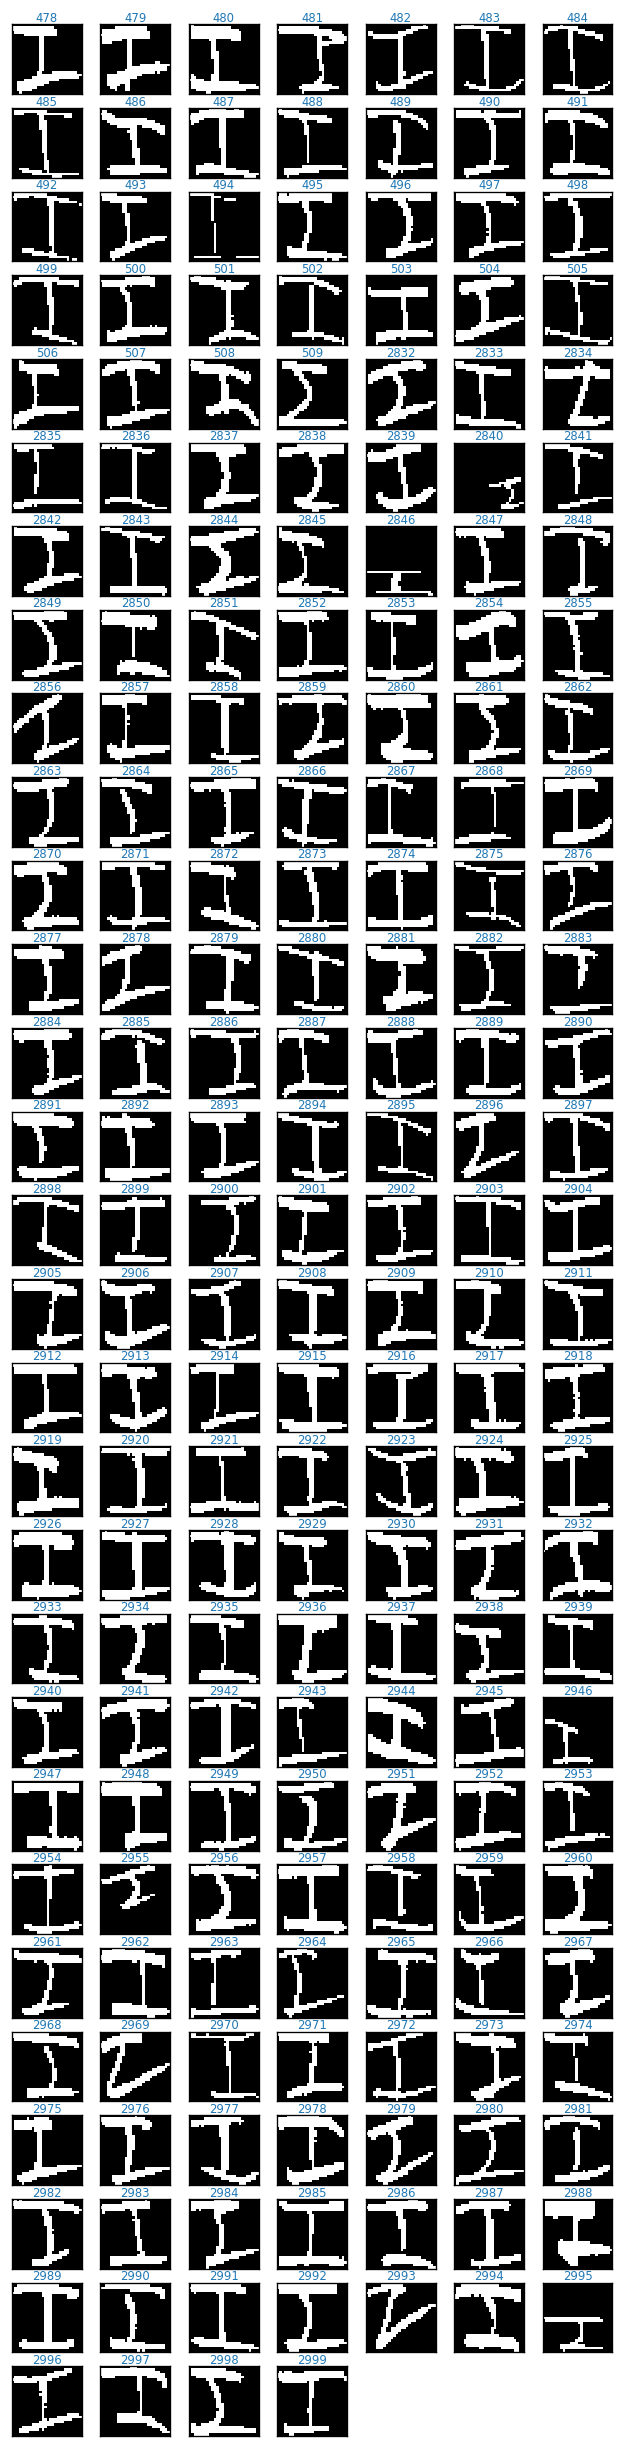

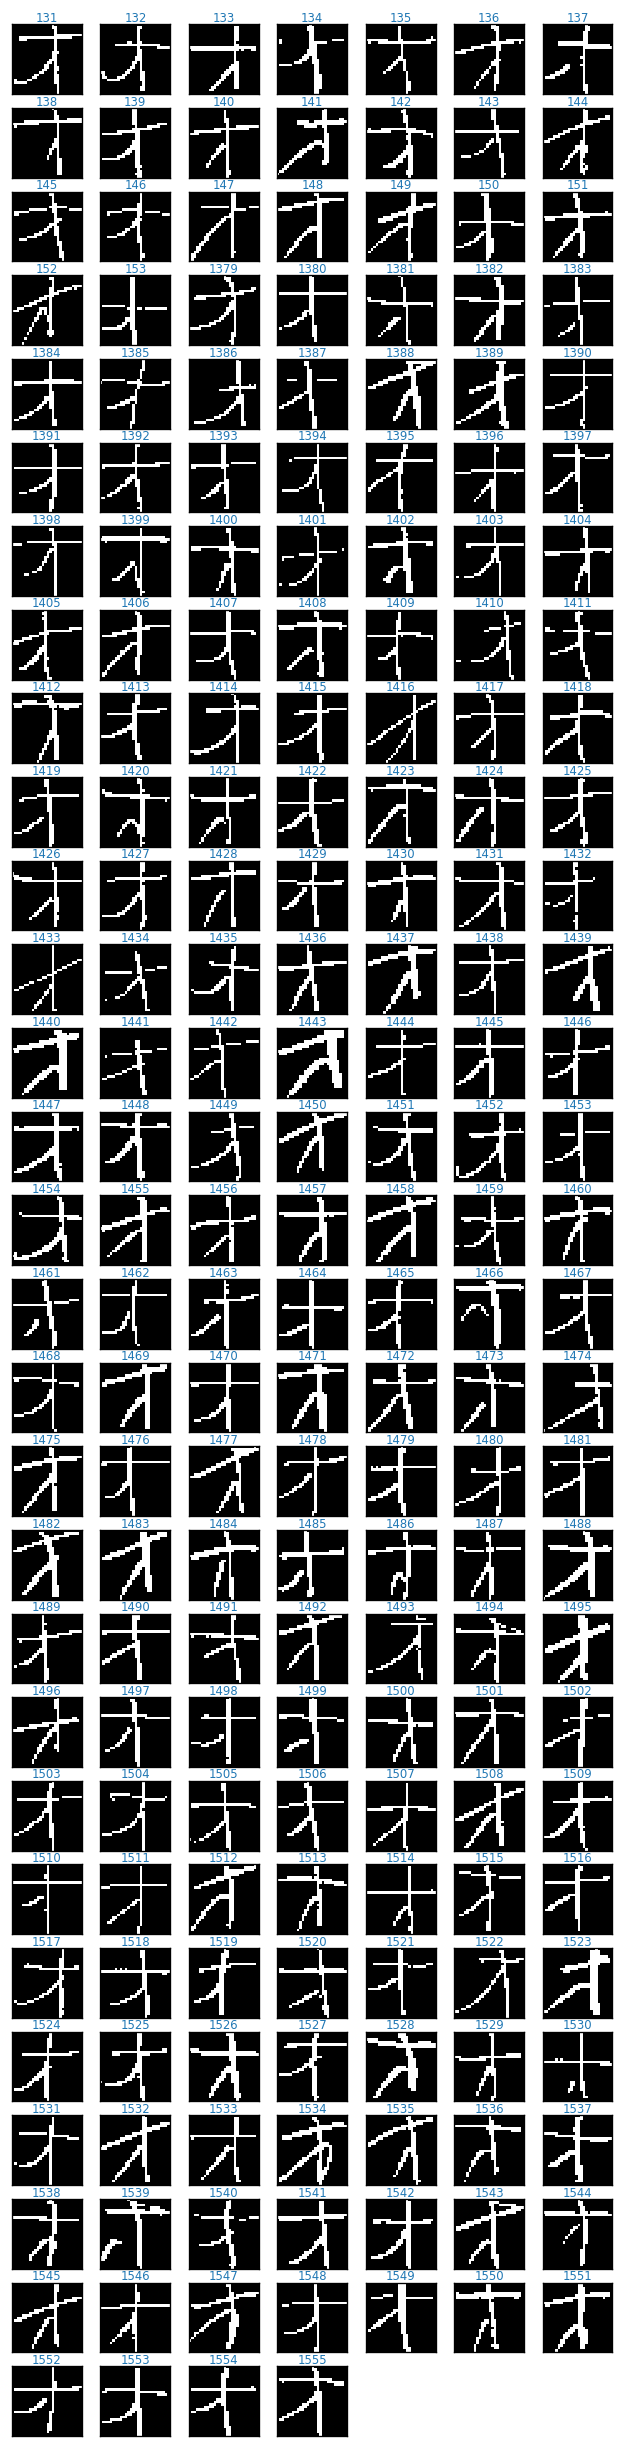

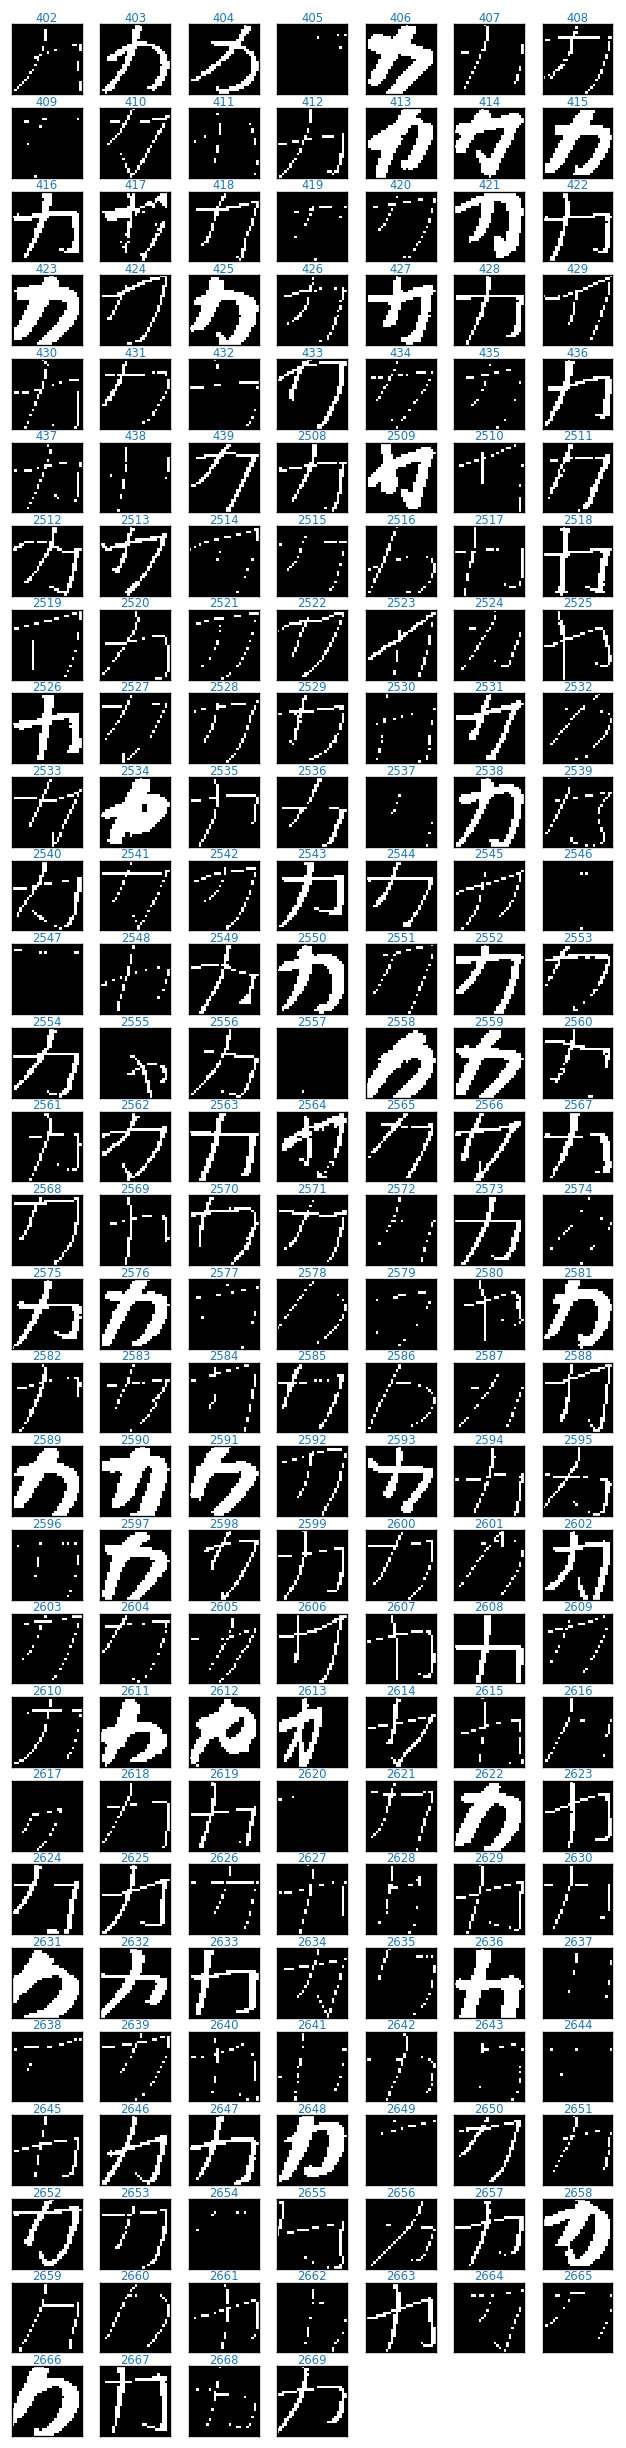

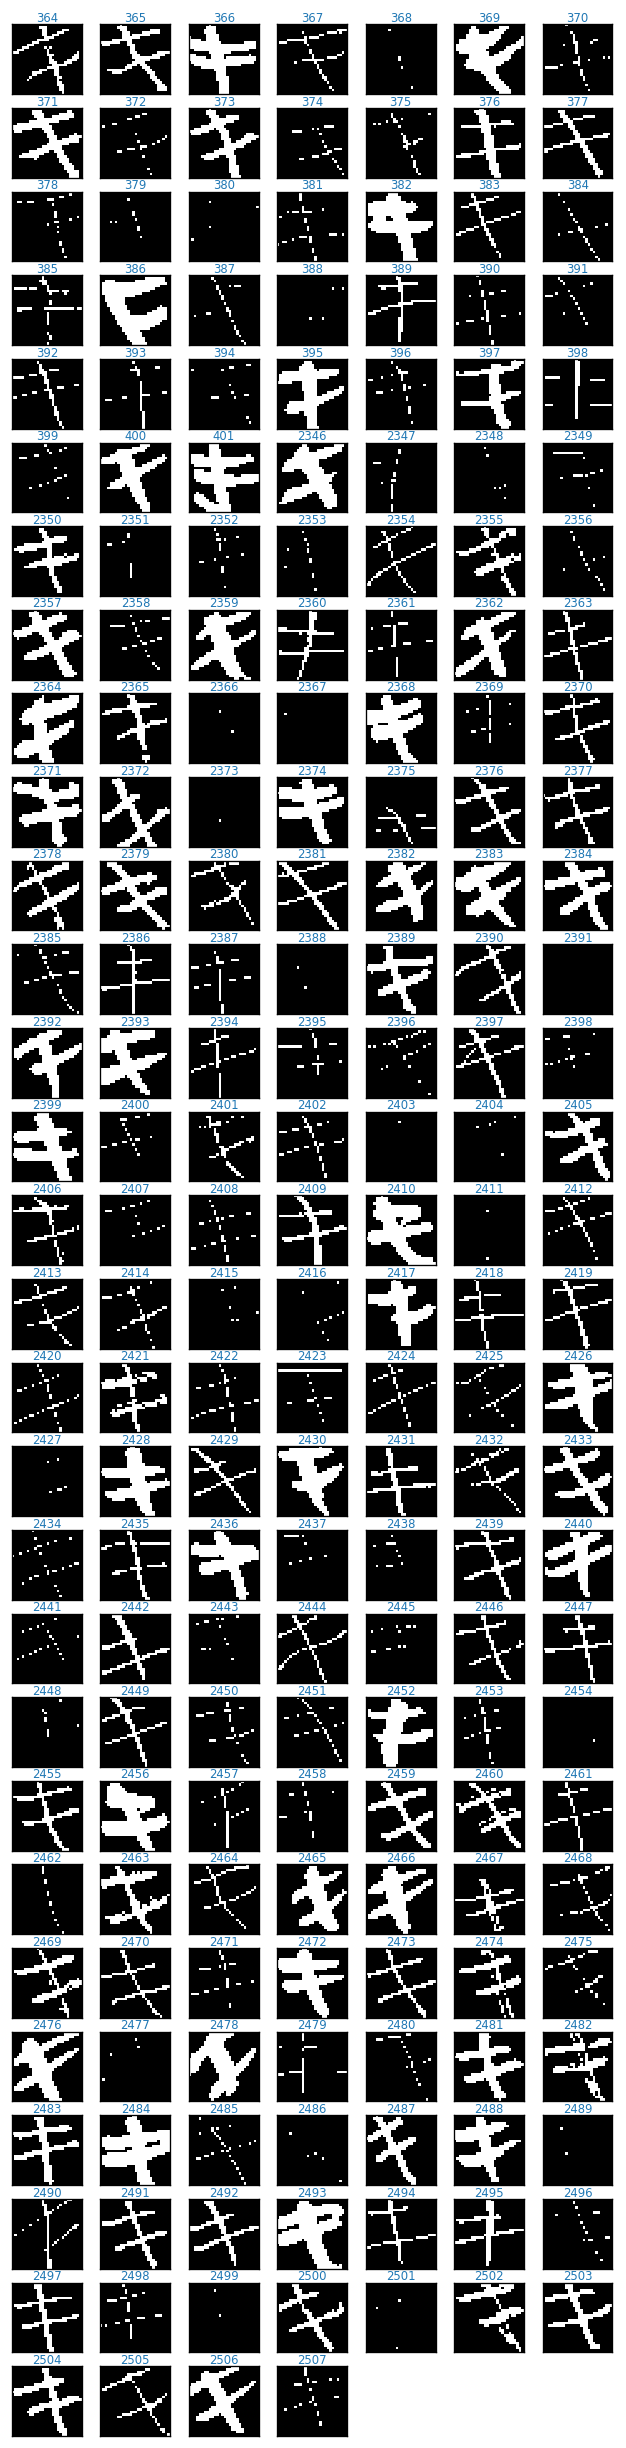

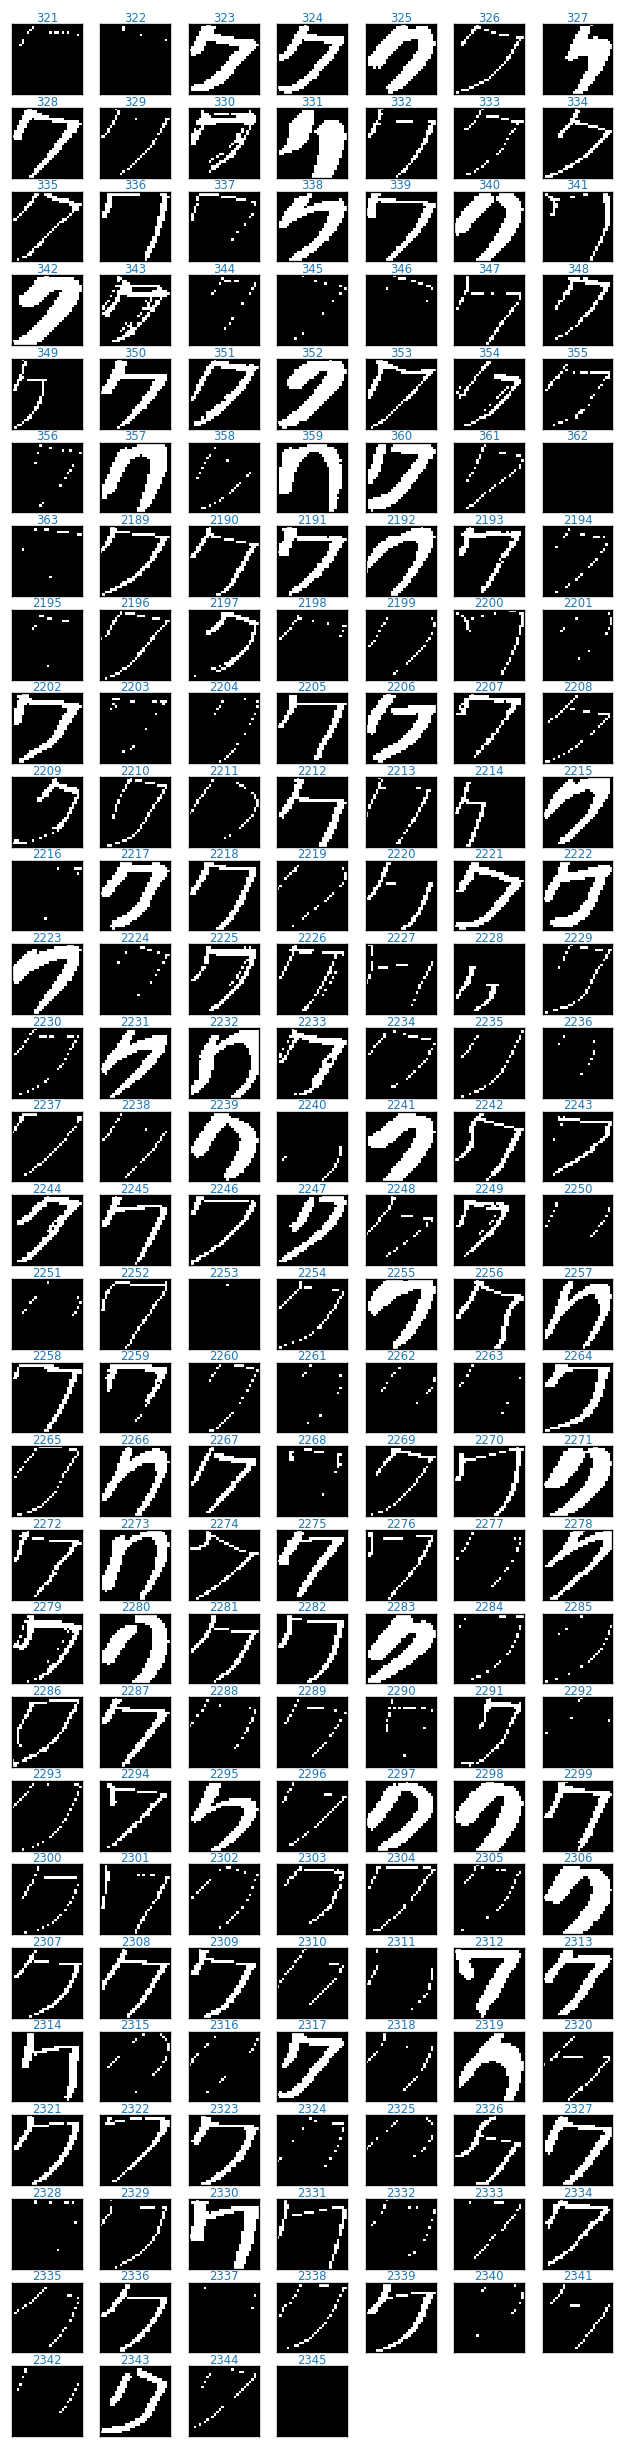

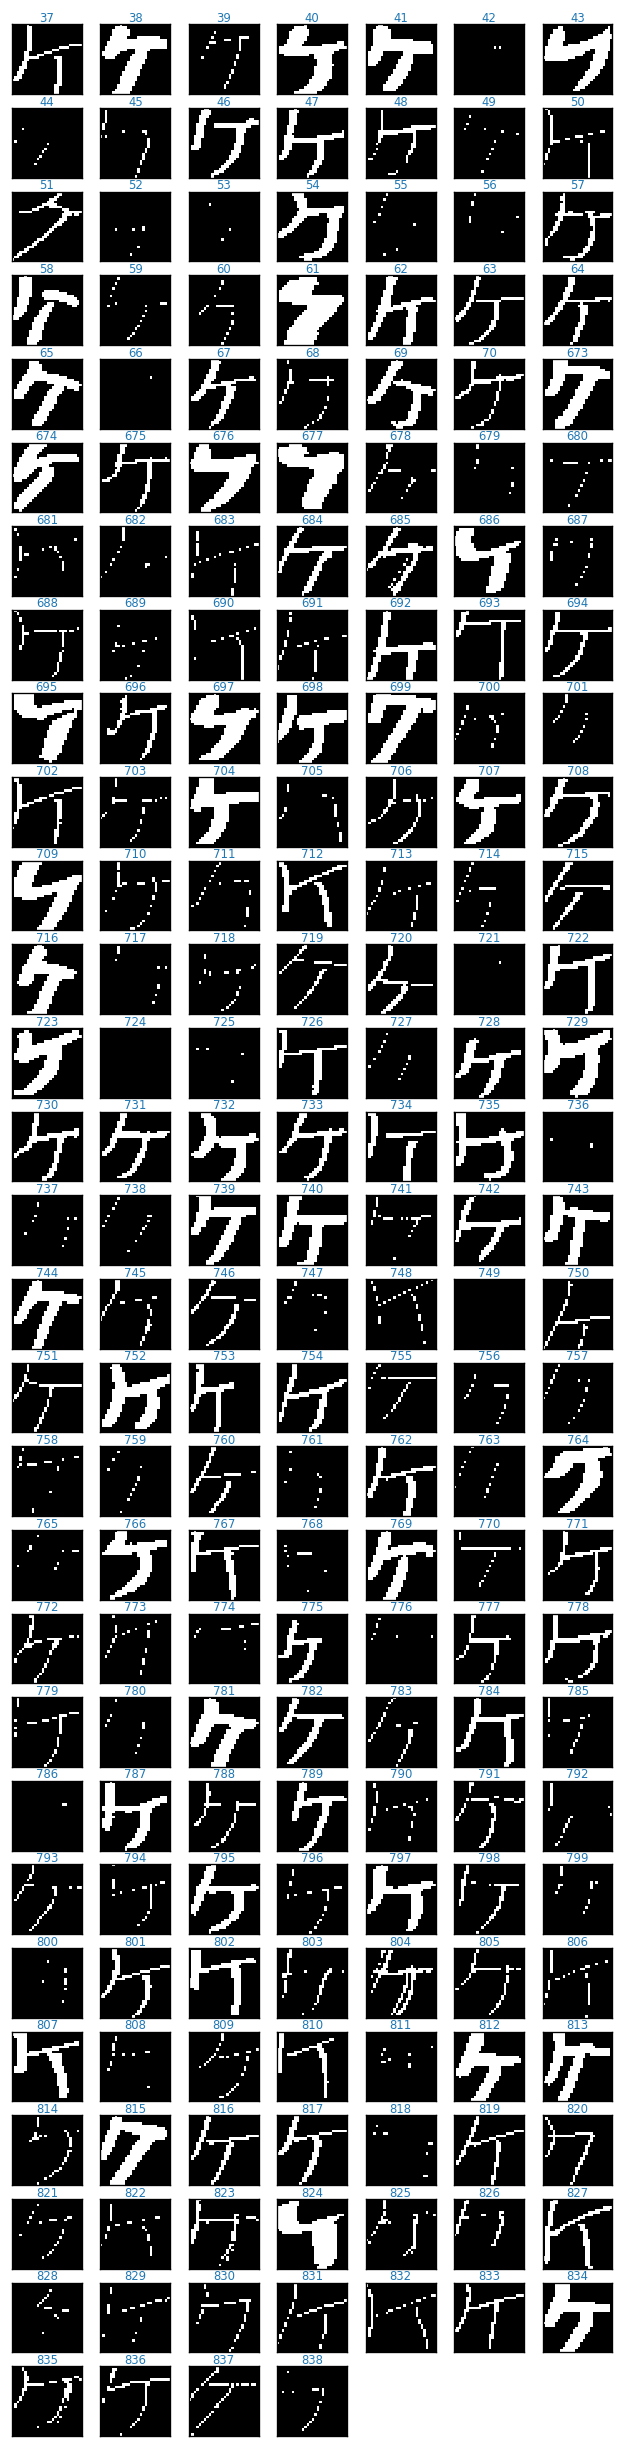

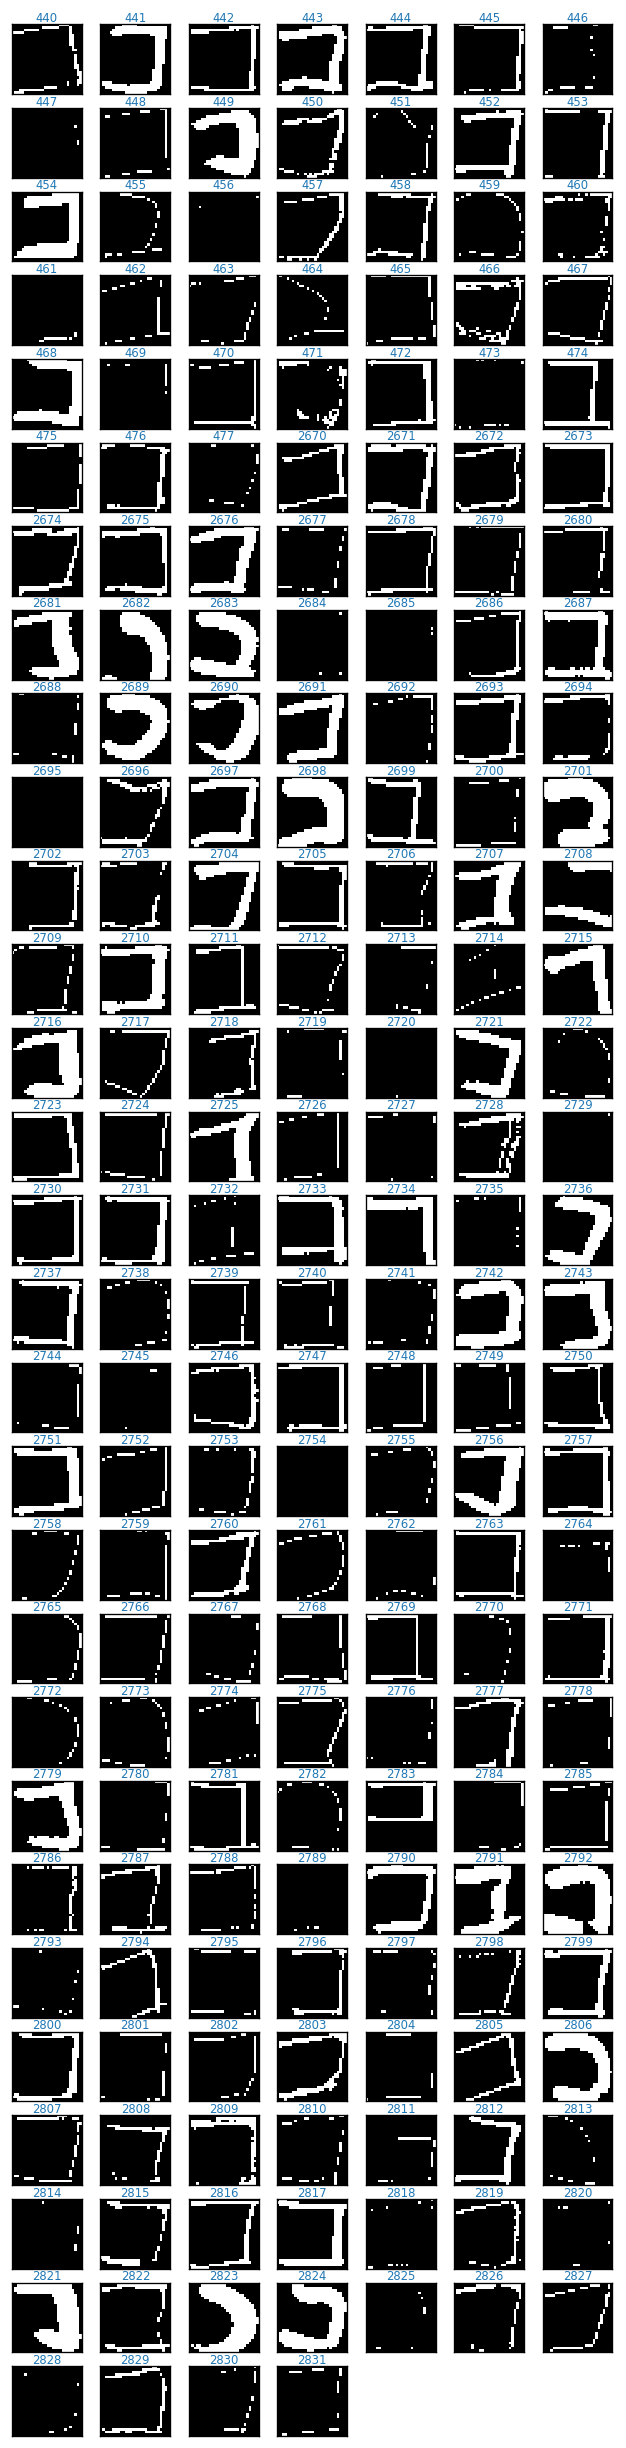

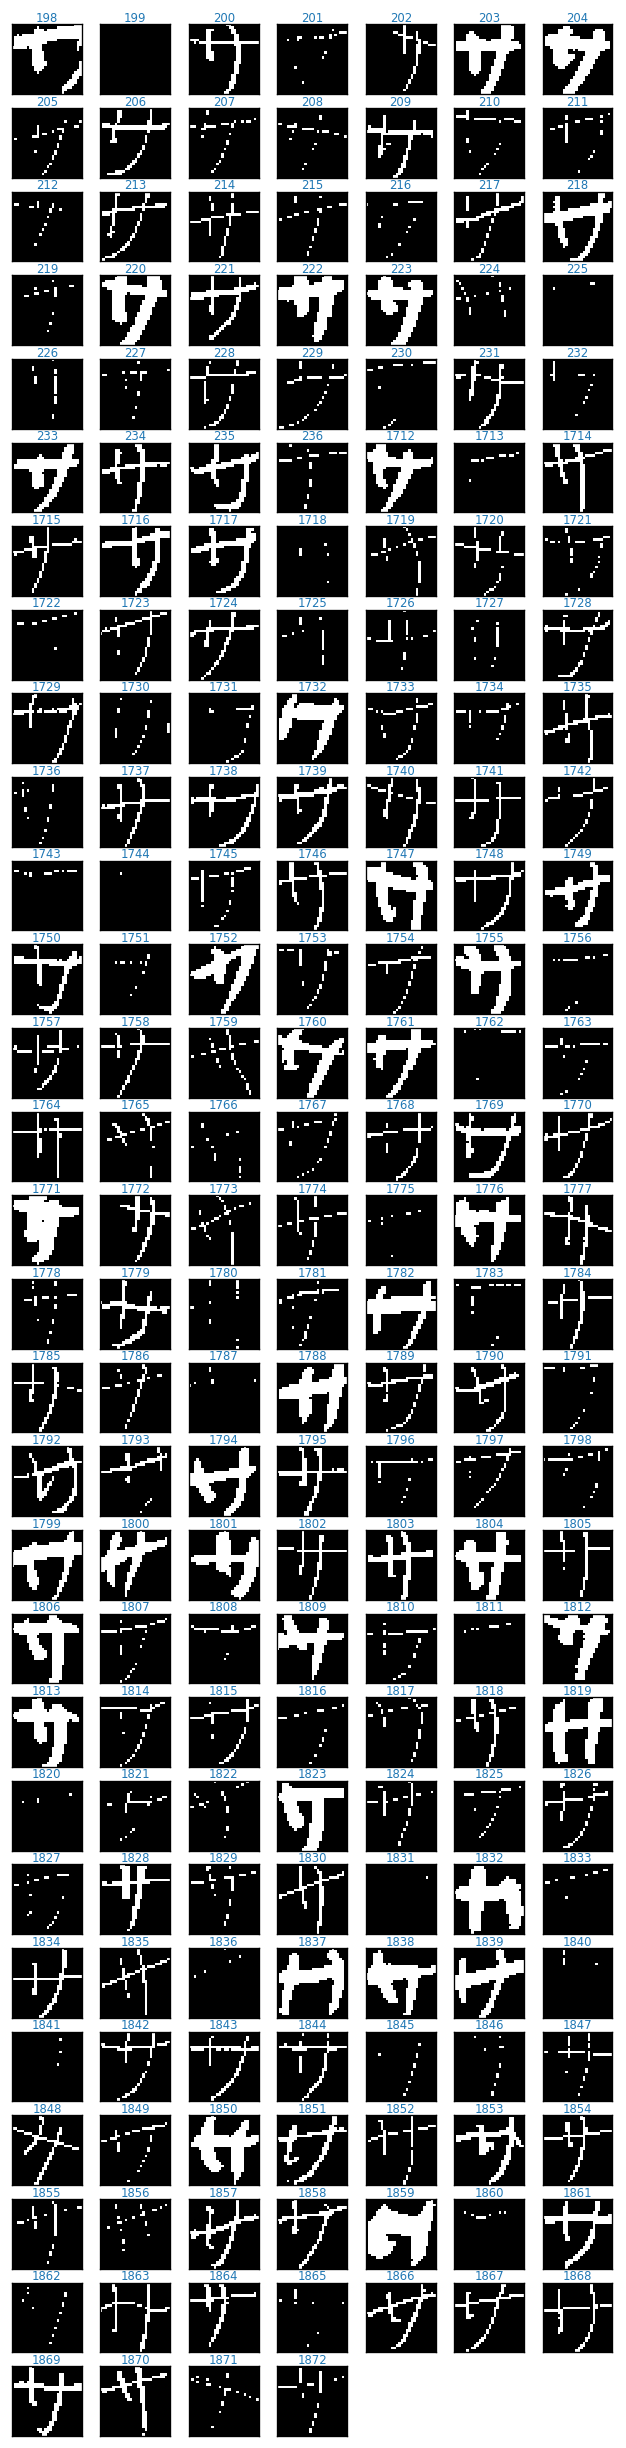

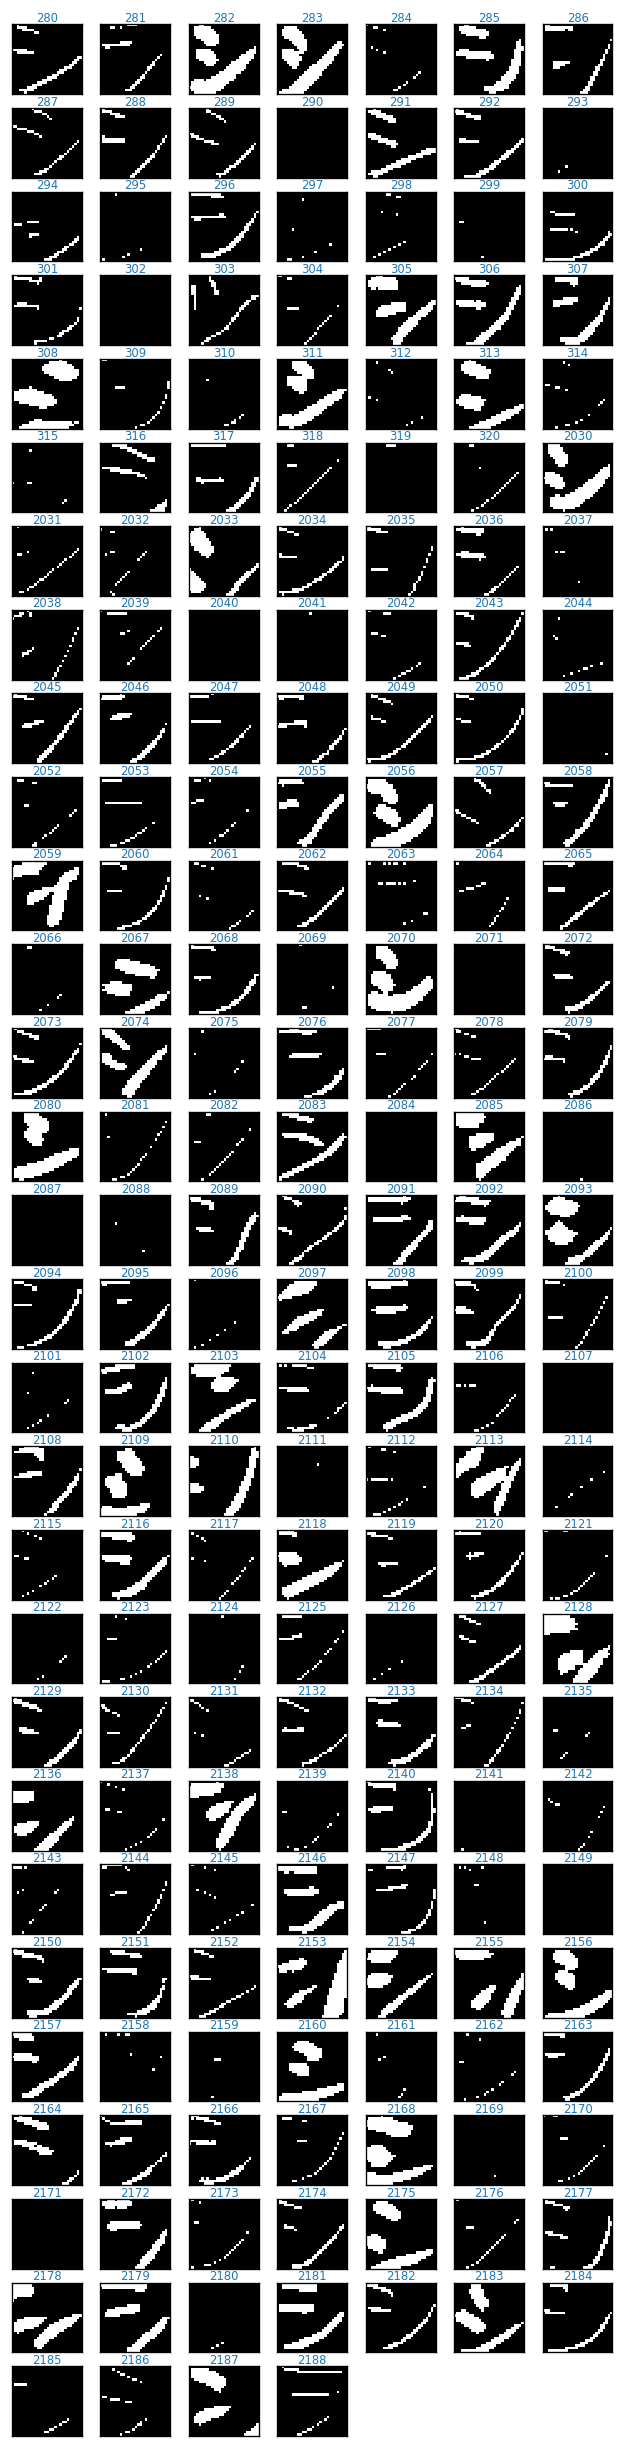

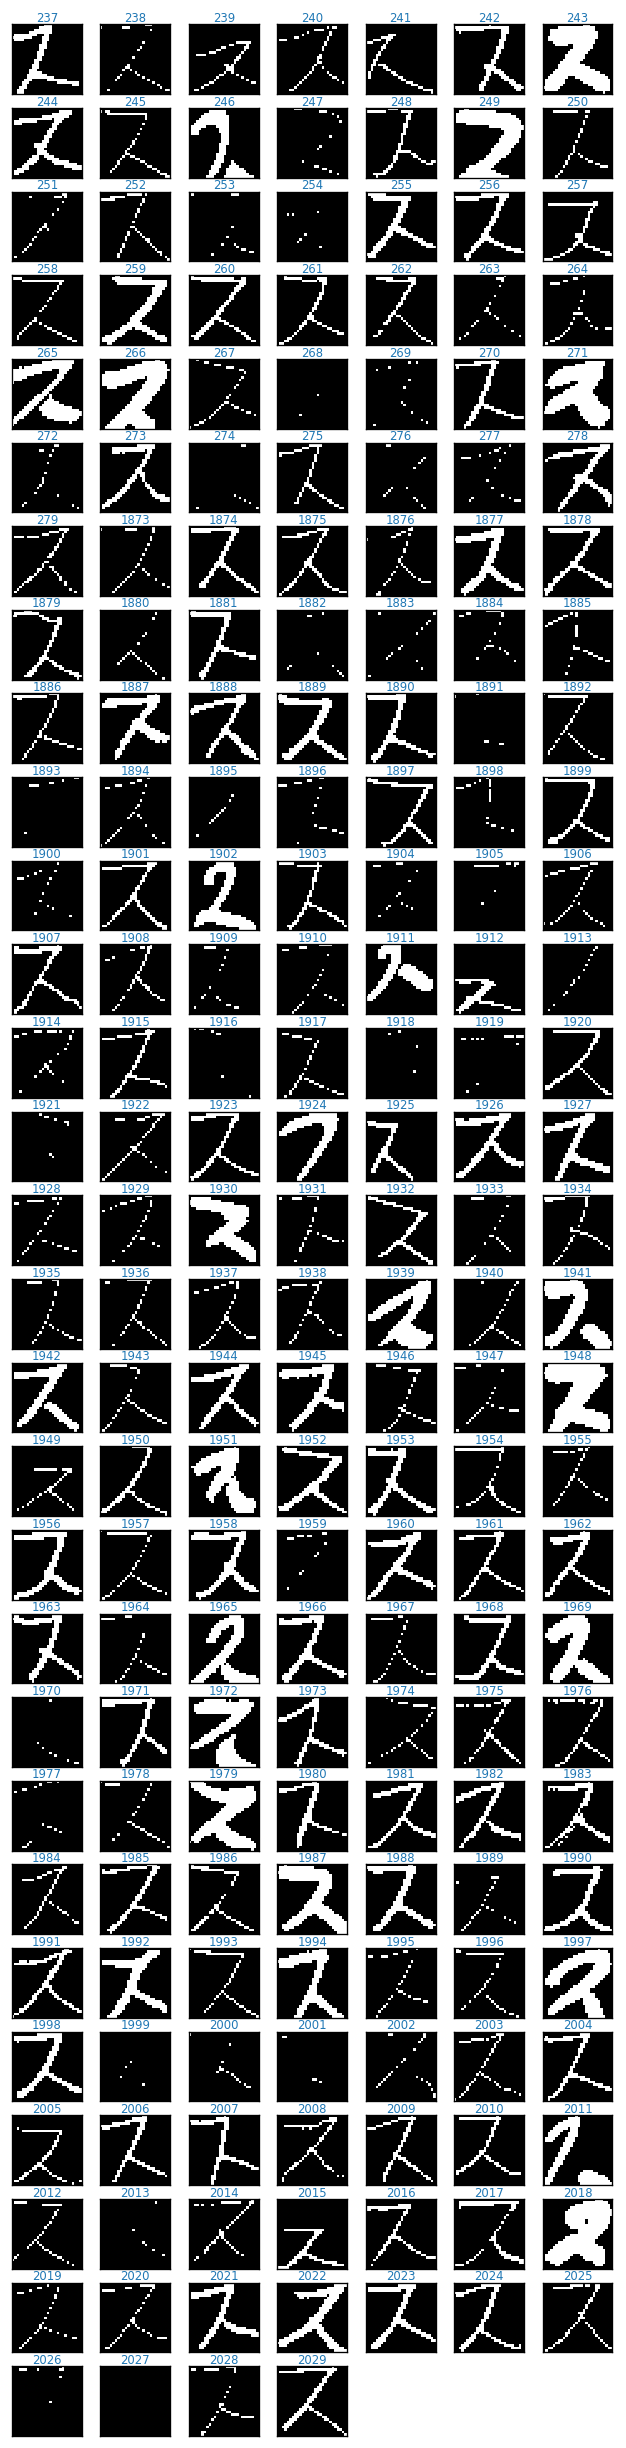

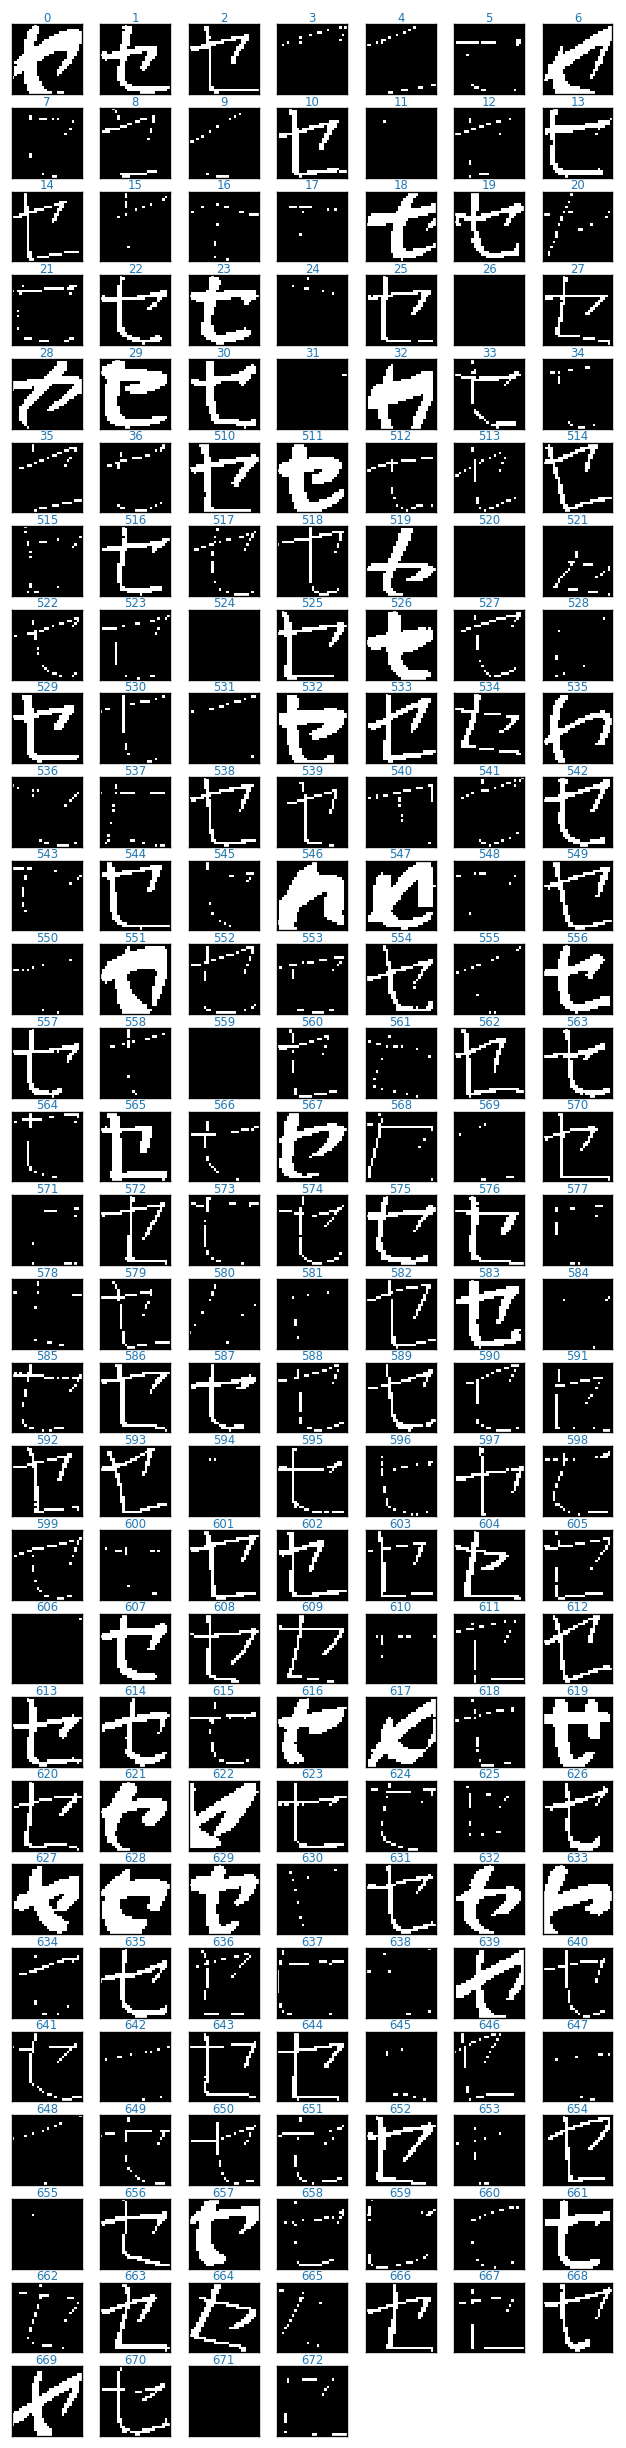

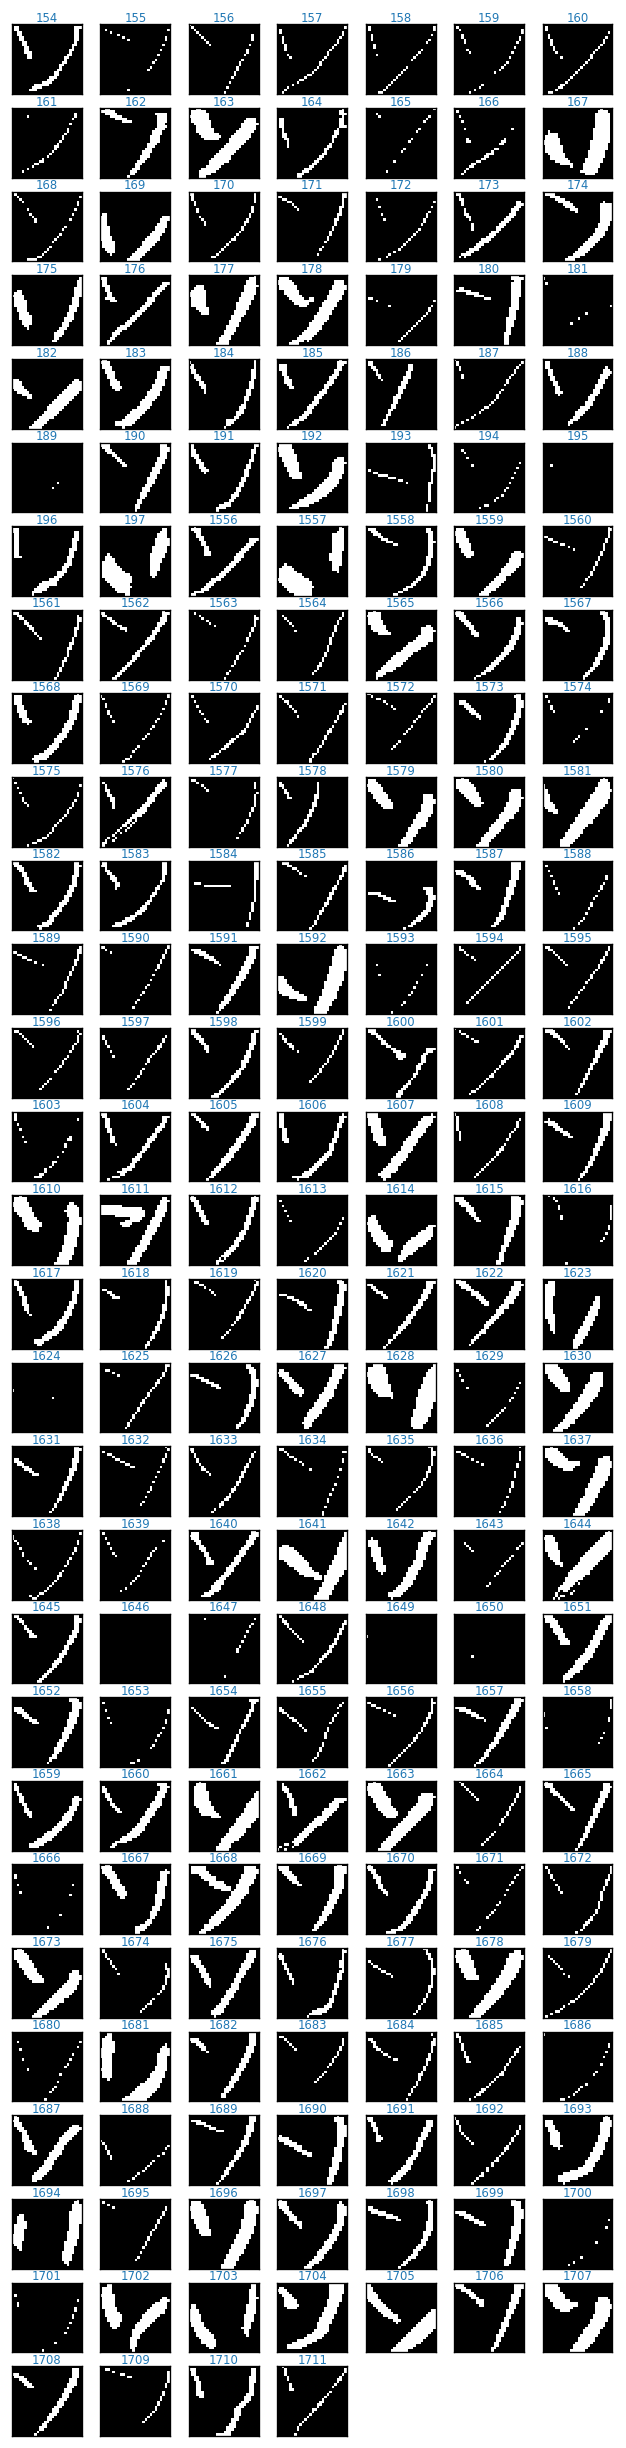

In [16]:
for t in range(0,15):

  # 正解値が t の行を抽出
  index_list = list(df[df['label_id']==t].index.values)

  # matplotlib 出力
  n_cols = 7
  n_rows = ((len(index_list)-1)//n_cols)+1
  fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
  for i,ax in enumerate( np.ravel(ax) ):
    if i < len(index_list):

      p = index_list[i]
      ax.imshow(train_data_image[p],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

#       # 予測（分類）を左上に表示
#       t = ax.text(1, 1, f'{test_pred[9][p]}', verticalalignment='top', fontsize=8, color='tab:red')
#       t.set_path_effects([pe.Stroke(linewidth=2, foreground='white'), pe.Normal()]) 

#       # 予測（分離）に対応する出力層のニューロンの値を括弧で表示
#       t = ax.text(5, 2, f'({s_test[p].max():.1f})', verticalalignment='top', fontsize=6, color='tab:red')
#       t.set_path_effects([pe.Stroke(linewidth=2, foreground='white'), pe.Normal()]) 

      # 目盛などを非表示に
      ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                     bottom=False, labelbottom=False)

      # 青色でインデックスを表示
      ax.set_title(index_list[i],fontsize=7,pad=1.5,color='tab:blue')

    else :
      ax.axis('off') # 余白処理

  plt.show()

判別が難しいデータをデータセットから除外する